In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [3]:
df=pd.read_csv('red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.shape

(1599, 12)


sns.pairplot(df,hue="quality") 

plt.savefig("mk1")
![Cat](mk1.png)

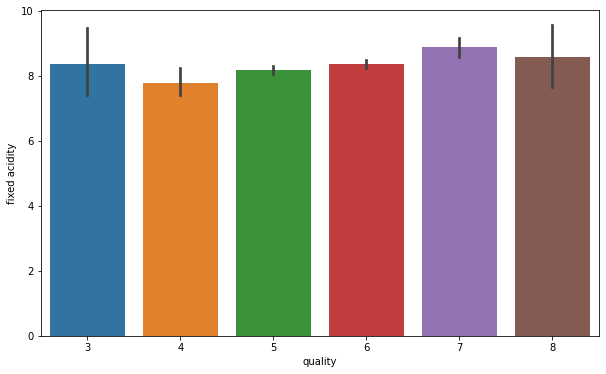

In [7]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity',data=df) 


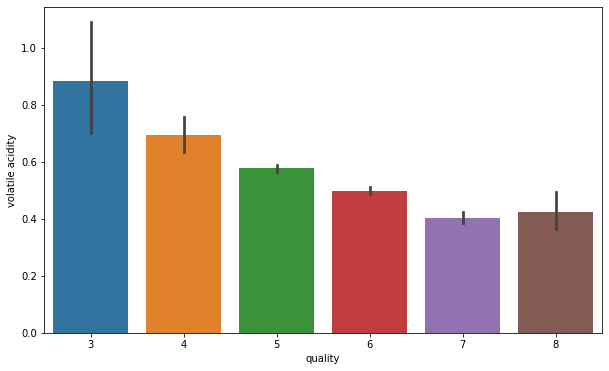

In [8]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity',data=df) 


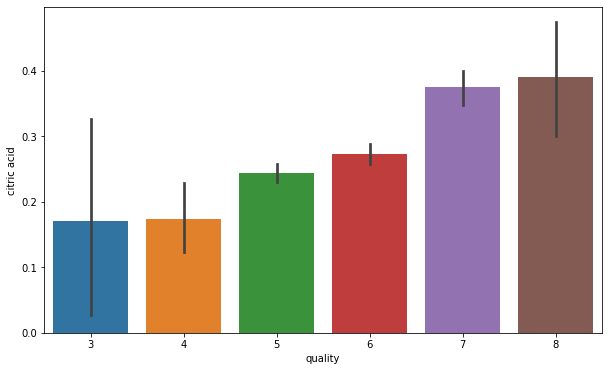

In [9]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid',data=df) 


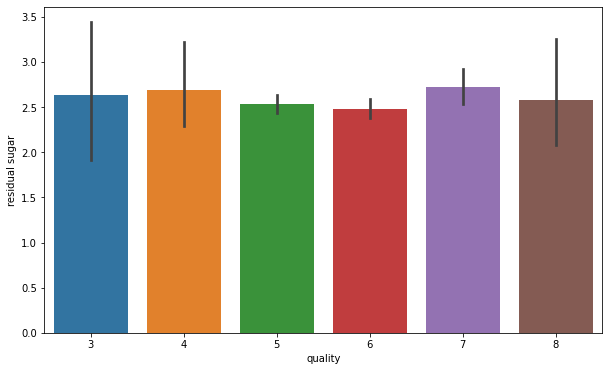

In [10]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar',data=df) 


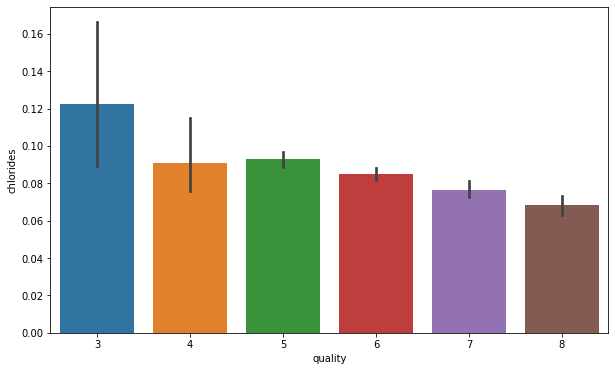

In [11]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides',data=df) 


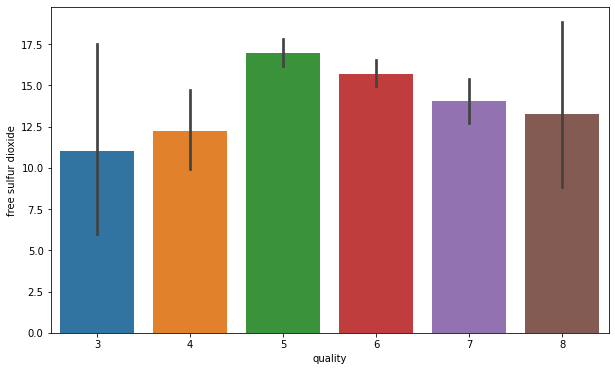

In [12]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide',data=df) 


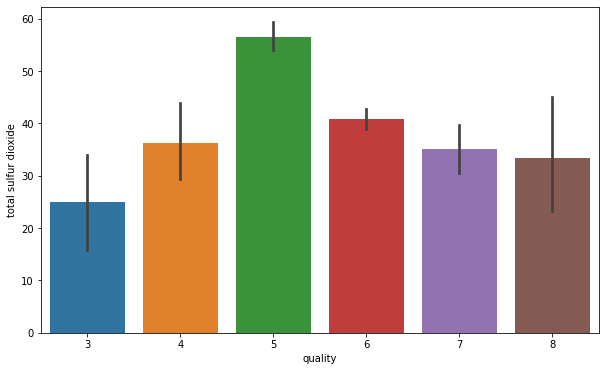

In [13]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide',data=df) 


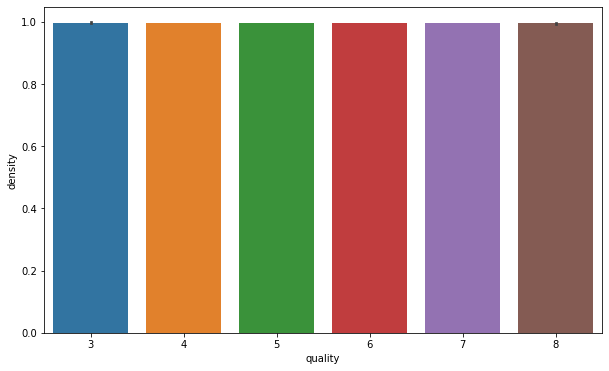

In [14]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density',data=df) 


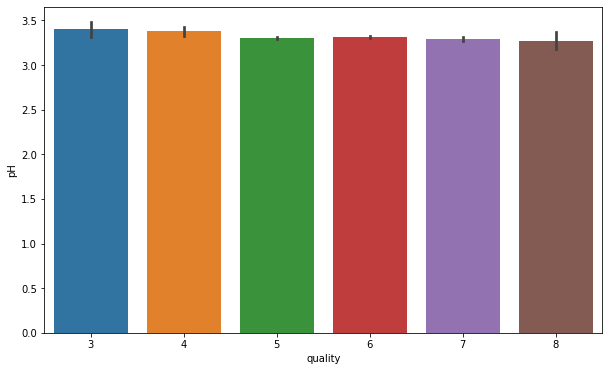

In [15]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH',data=df) 


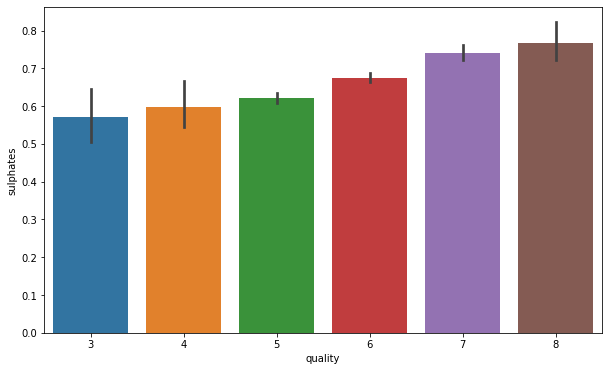

In [16]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates',data=df) 


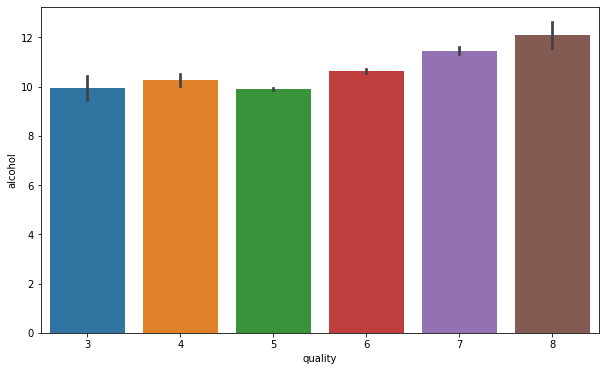

In [17]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol',data=df) 


In [18]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
bins = (2, 6, 8)

group_names = ['bad', 'good']

df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [20]:
label_quality=LabelEncoder()

In [21]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [22]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

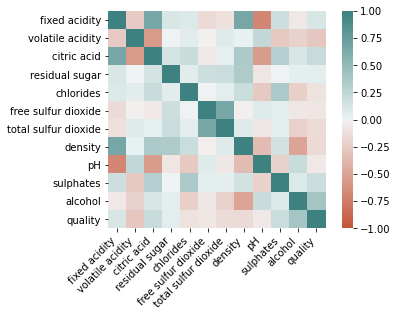

In [23]:
 corr = df.corr()

ax = sns.heatmap(

 corr,

 vmin=-1, vmax=1, center=0,

 cmap=sns.diverging_palette(20, 190, n=2000),

 square=True

)

ax.set_xticklabels(

 ax.get_xticklabels(),

 rotation=45,

 horizontalalignment='right'

);

In [24]:
 corr_matrix = df.corr()

corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

In [25]:
y=df['quality']

In [26]:
x=df.drop(['quality'],axis=1)

In [27]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =

0.4, random_state = 42)

In [29]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.fit_transform(x_test)

In [30]:
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(x_train, y_train)

pred_rfc = rfc.predict(x_test) 



In [31]:
rfc.score(x_test,y_test)

0.8890625

In [32]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       551
           1       0.66      0.43      0.52        89

    accuracy                           0.89       640
   macro avg       0.78      0.70      0.73       640
weighted avg       0.88      0.89      0.88       640



In [33]:
svc = SVC()

svc.fit(x_train, y_train)

pred_svc = svc.predict(x_test)
svc.score(x_test,y_test) 

0.884375

In [34]:
param = {

    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],

    'kernel':['linear', 'rbf'],

    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]

}

grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [35]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [36]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.9, 'kernel': 'rbf'}

In [37]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')

svc2.fit(x_train, y_train)

pred_svc2 = svc2.predict(x_test)


In [38]:
svc2.score(x_test,y_test) 

0.890625

In [39]:
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=50) 

model=RandomForestClassifier()

scores=cross_val_score(model,x,y,cv=skfold)

print(scores)

print(np.mean(scores))

[0.875      0.90625    0.875      0.875      0.96875    0.9375
 0.90625    0.875      0.90625    0.9375     0.9375     0.78125
 0.90625    0.90625    0.90625    0.875      0.9375     0.875
 0.9375     0.875      0.9375     0.96875    0.875      0.90625
 0.96875    0.90625    0.90625    0.9375     0.75       0.96875
 0.84375    0.875      0.75       0.875      0.875      0.875
 0.84375    0.8125     0.875      0.9375     0.90625    0.9375
 0.90625    0.84375    0.9375     0.875      0.96875    0.875
 0.875      0.90322581]
0.8943145161290323
